# GPT-4 Vision

GPT-4 Turbo with Vision is a large multimodal model (LMM) developed by OpenAI that can analyze images and provide textual responses to questions about them. It incorporates both natural language processing and visual understanding.

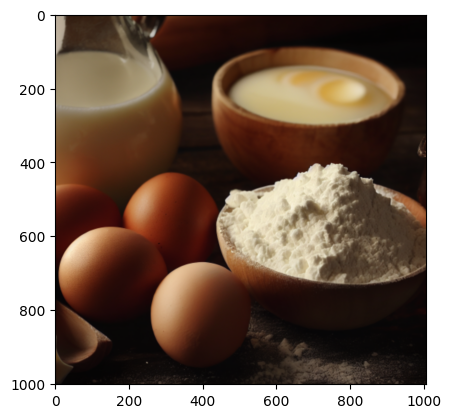

In [2]:
# Show data/ingredients.png image below
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('data/ingredients.png')
plt.imshow(img)
plt.show()


In [1]:
import os
import requests
import base64

# Configuration
GPT4V_KEY = os.getenv('AZURE_OPENAI_API_KEY_GPT4V')
IMAGE_PATH = "./data/ingredients.png"
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

# Payload for the request
payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          "text": "Describe this picture"
        }
      ]
    }
  ],
  "temperature": 0.7,
  "top_p": 0.95,
  "max_tokens": 800
}

GPT4V_ENDPOINT = f"{os.getenv('AZURE_OPENAI_API_BASE_GPT4V')}openai/deployments/{os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME_GPT4V')}/chat/completions?api-version=2024-02-15-preview"

# Send request
try:
    response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
    response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
except requests.RequestException as e:
    raise SystemExit(f"Failed to make the request. Error: {e}")

# Handle the response as needed (e.g., print or process)
print(response.json()['choices'][0]['message']['content'])

The picture shows a collection of ingredients commonly used in baking. There is a jug of milk, a bowl of flour, a bowl containing two eggs with one of them cracked open, and a few whole eggs resting on the surface. The setting gives off a rustic vibe, suggesting that these ingredients are perhaps set up for preparing a homemade recipe.
